In [ ]:
import numpy as np
import pandas as pd


fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [ ]:
fruits_2d = fruits.reshape(-1,100*100) # 300,10000으로 변환

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42) # 군집 갯수(전체를 3개 군집으로 나눔)
km.fit(fruits_2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [30]:
lable = km.labels_

In [31]:
np.unique(lable, return_counts=True) # 원래 96, 98, 106 현재 결과는 사과 파인애플 햇갈림

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [47]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio = 1):
    total = len(arr)
    rows = int(np.ceil(total/10))
    cols = total if total<=10 else 10
    _, axs = plt.subplots(rows, cols, figsize = (cols*ratio,rows*ratio))
    for i in range(rows):
        for j in range(cols):
            cur = i * 10 + j 
            if  cur < total:
                axs[i,j].imshow(arr[cur], cmap='hot_r')
            axs[i,j].axis('off')
    plt.show()

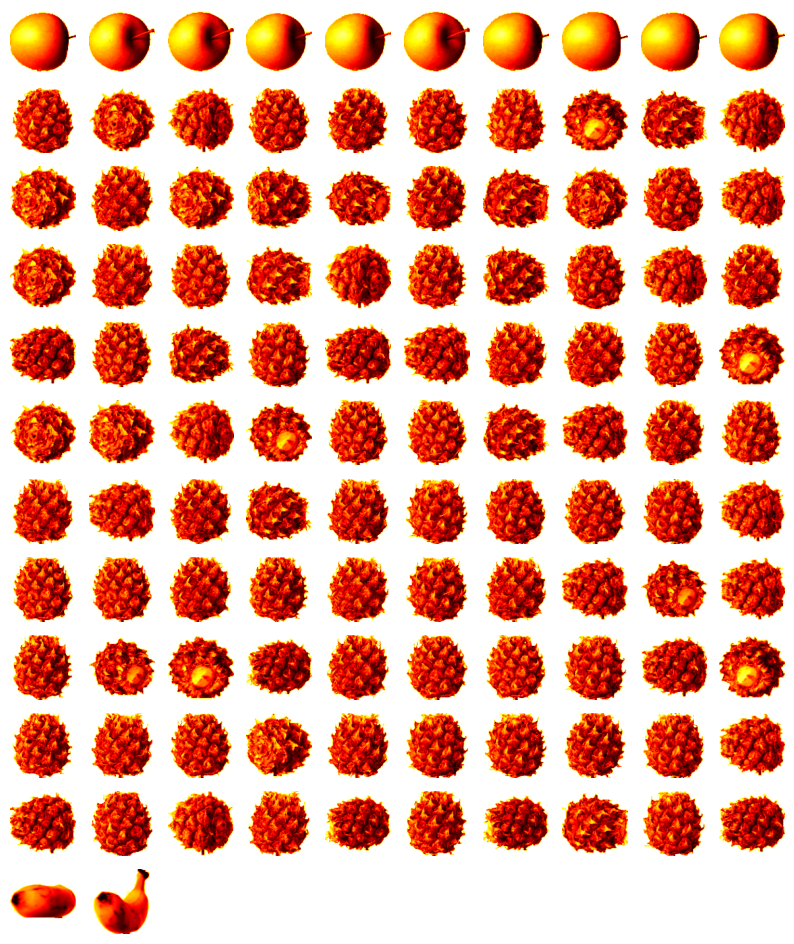

In [48]:
draw_fruits(fruits[lable == 0])

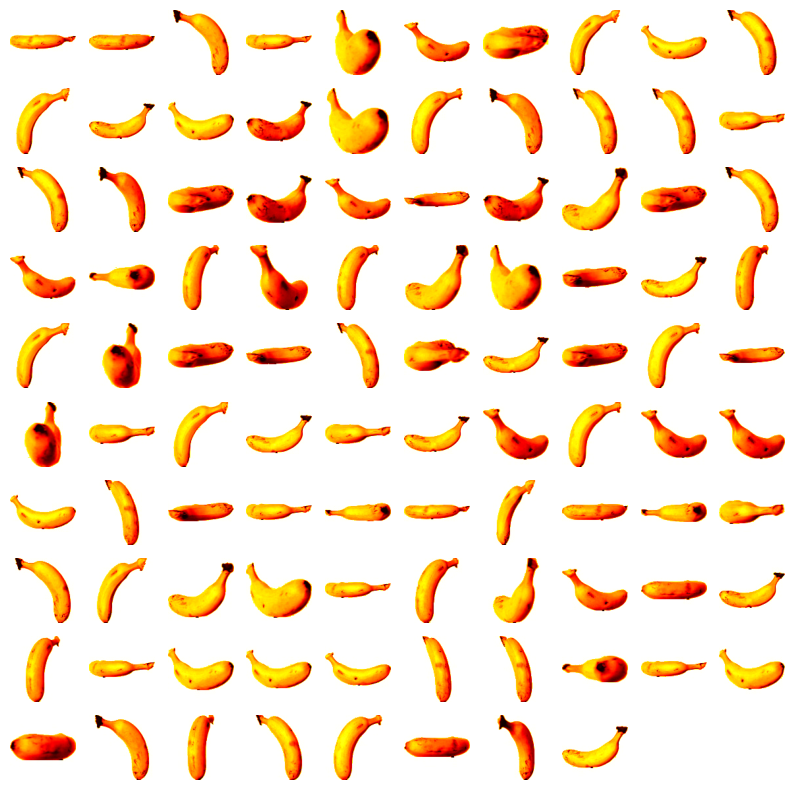

In [ ]:
draw_fruits(fruits[lable == 1])


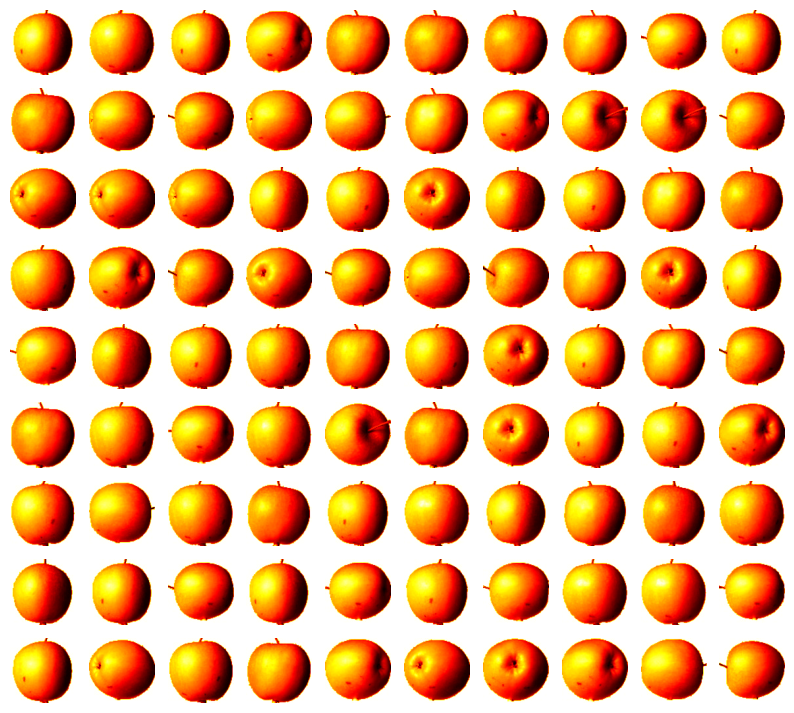

In [35]:
draw_fruits(fruits[lable == 2])


In [36]:
km.n_iter_

4

In [37]:
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

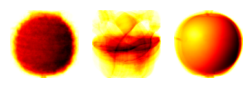

In [38]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100))

In [40]:
km.transform(fruits_2d[100:101])

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [ ]:
km.predict(fruits_2d[100:101])

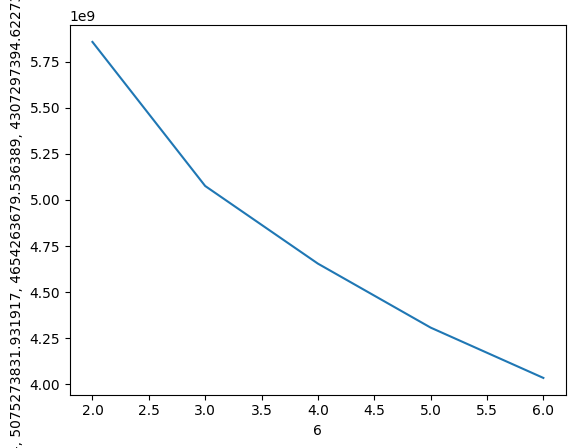

In [42]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel(k)
plt.ylabel(inertia)
plt.show()